# Using Regression to Predict House Prices

## Importing the file containing market value house prices

In [4]:
import graphlab

In [10]:
import os

In [16]:
os.chdir("/Users/Sormeh/desktop/ML")

## Mean of house prices at zipcode=98039

In [112]:
sales=graphlab.SFrame("home_data.gl/")

In [113]:
graphlab.canvas.set_target("ipynb")

In [114]:
sales["zipcode"].show()

In [116]:
import matplotlib.pyplot as plt


In [117]:
%matplotlib inline

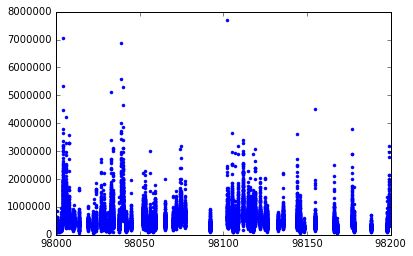

In [118]:
plt.plot(sales["zipcode"],sales["price"],".")

In [153]:
x=sales[sales["zipcode"]=="98039"]

In [159]:
float(sum(x["price"]))/len(x["price"])

2160606.6

## Percentage of houses with square feet (>2000 & <=4000)

In [150]:
P=sales[(sales["sqft_living"]>2000) & (sales["sqft_living"]<=4000)]

In [146]:
len(sales)

21613

In [151]:
len(P)

9118

In [179]:
float(len(P))/len(sales)

0.42187572294452413

## Building regression with more features

In [160]:
my_features = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'zipcode']

In [164]:
advanced_features = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'zipcode','condition','grade', 'waterfront', 'view', 'sqft_above', 'sqft_basement', 'yr_built','yr_renovated', 'lat', 'long', 'sqft_living15','sqft_lot15']

In [167]:
train_data,test_data=sales.random_split(0.8,seed=0)

In [176]:
Reg_my_features=graphlab.linear_regression.create(train_data,target="price",features=my_features, validation_set=None)

Linear regression:

--------------------------------------------------------

Number of examples          : 17384

Number of features          : 6

Number of unpacked features : 6

Number of coefficients    : 115

Starting Newton Method

--------------------------------------------------------

+-----------+----------+--------------+--------------------+---------------+

| Iteration | Passes   | Elapsed Time | Training-max_error | Training-rmse |

+-----------+----------+--------------+--------------------+---------------+

| 1         | 2        | 0.045479     | 3763208.270523     | 181908.848367 |

+-----------+----------+--------------+--------------------+---------------+

SUCCESS: Optimal solution found.

In [175]:
Reg_advanced_features=graphlab.linear_regression.create(train_data,target="price",features=advanced_features, validation_set=None)

Linear regression:

--------------------------------------------------------

Number of examples          : 17384

Number of features          : 18

Number of unpacked features : 18

Number of coefficients    : 127

Starting Newton Method

--------------------------------------------------------

+-----------+----------+--------------+--------------------+---------------+

| Iteration | Passes   | Elapsed Time | Training-max_error | Training-rmse |

+-----------+----------+--------------+--------------------+---------------+

| 1         | 2        | 0.083307     | 3469012.450686     | 154580.940736 |

+-----------+----------+--------------+--------------------+---------------+

SUCCESS: Optimal solution found.

In [177]:
Reg_my_features.evaluate(test_data)

{'max_error': 3486584.509381705, 'rmse': 179542.4333126903}

In [178]:
Reg_advanced_features.evaluate(test_data)

{'max_error': 3556849.413858208, 'rmse': 156831.1168021901}